In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from random import random

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from models import ModelManager, ModelType
from utils import MnistData

In [ ]:
data = MnistData()

## Training

In [205]:
generator = ModelManager.get_untrained(ModelType.Generator)
discriminator = ModelManager.get_untrained(ModelType.Discriminator)

In [ ]:
batch = 10

---0:D:1.3835327625274658:G:0.6530339121818542---


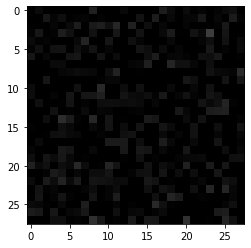

---20:D:1.6712157726287842:G:0.43909329175949097---


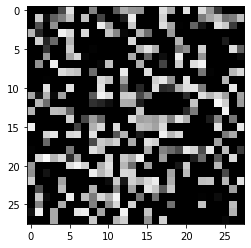

---40:D:1.6772428750991821:G:0.43595176935195923---


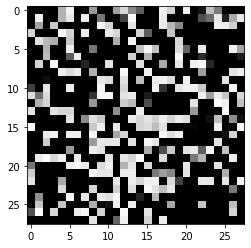

---60:D:1.6333351135253906:G:0.4611620008945465---


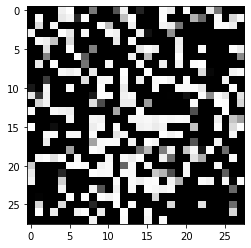

---80:D:1.5821506977081299:G:0.48928505182266235---


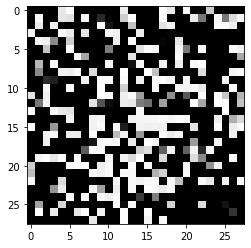

---100:D:1.5249881744384766:G:0.5197979211807251---


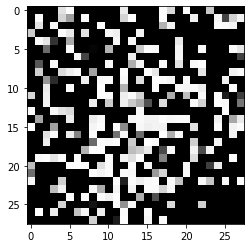

---120:D:1.5007531642913818:G:0.538465678691864---


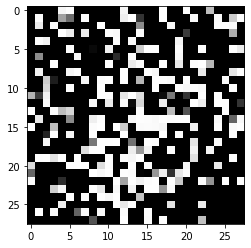

---140:D:1.463665246963501:G:0.5602227449417114---


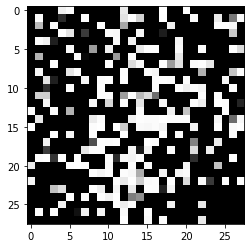

---160:D:1.4289329051971436:G:0.5855008363723755---


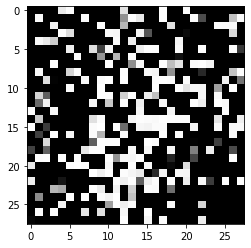

---180:D:1.3926218748092651:G:0.6099027395248413---


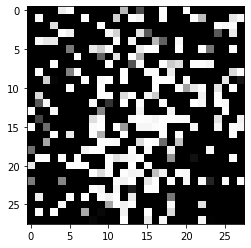

---200:D:1.3794481754302979:G:0.6195303797721863---


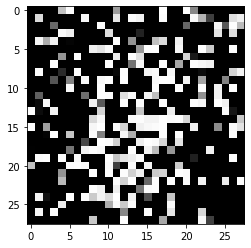

---220:D:1.3659553527832031:G:0.6321874856948853---


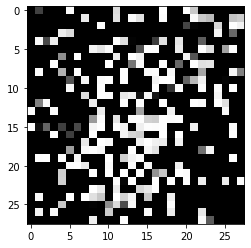

---240:D:1.365830421447754:G:0.6314566731452942---


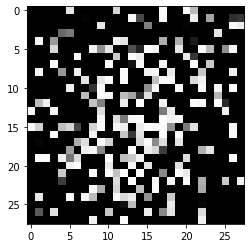

---260:D:1.3416738510131836:G:0.6379488110542297---


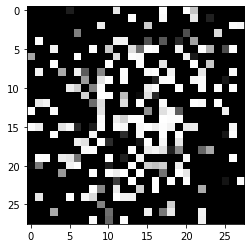

---280:D:1.3496754169464111:G:0.6266127228736877---


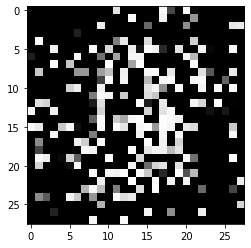

---300:D:1.3645650148391724:G:0.6131503582000732---


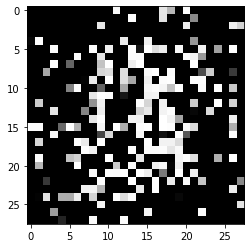

---320:D:1.3719639778137207:G:0.5952784419059753---


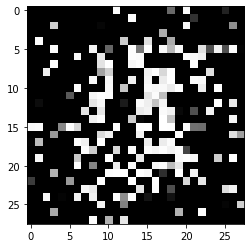

---340:D:1.3748538494110107:G:0.6082709431648254---


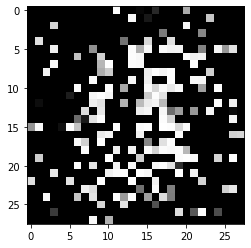

---360:D:1.3716208934783936:G:0.6041421890258789---


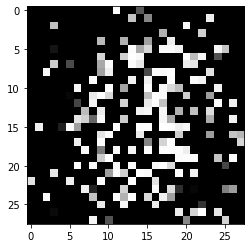

---380:D:1.3754836320877075:G:0.6071871519088745---


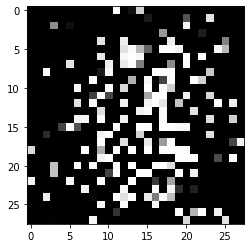

---400:D:1.3403680324554443:G:0.6225258111953735---


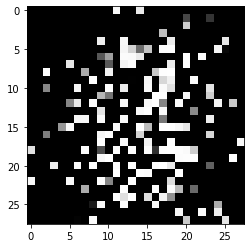

---420:D:1.3199902772903442:G:0.6269921660423279---


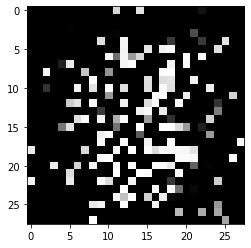

---440:D:1.333705186843872:G:0.618500828742981---


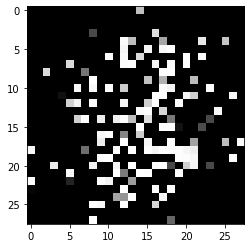

---460:D:1.3124580383300781:G:0.6304365396499634---


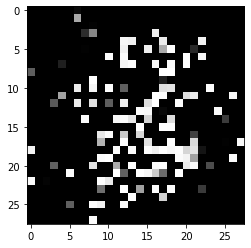

---480:D:1.3400194644927979:G:0.604211688041687---


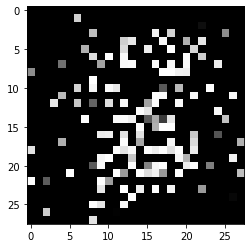

---500:D:1.3527002334594727:G:0.5964330434799194---


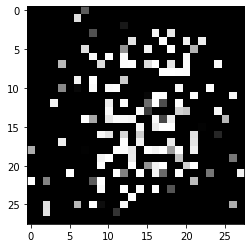

---520:D:1.325127363204956:G:0.60211181640625---


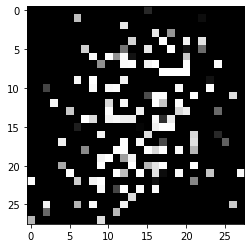

---540:D:1.3493154048919678:G:0.5944232940673828---


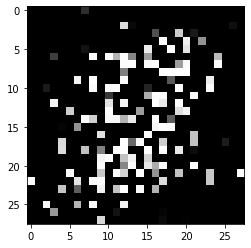

---560:D:1.3301963806152344:G:0.5964195728302002---


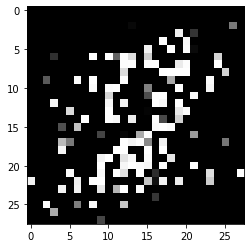

---580:D:1.2930874824523926:G:0.6218980550765991---


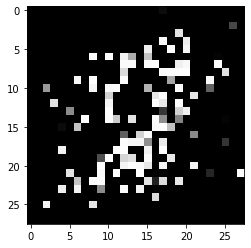

KeyboardInterrupt: 

In [206]:
discriminator_optimizer_slow = optim.Adam(discriminator.parameters(), lr=1e-5)
discriminator_optimizer_fast = optim.SGD(discriminator.parameters(), lr=1e-3, momentum=0.99)
generator_optimizer = optim.RMSprop(generator.parameters(), lr=1e-5)


for epoch in range(1501):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.tensor(
        [[1.0 if random() >= 0.5 else 0.0 for _ in range(100)] for _ in range(batch)]
    )
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer_slow.zero_grad()
    discriminator_optimizer_fast.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = nn.BCELoss()(batch_of_generated_discrimination, torch.zeros(batch, 1)) \
        + nn.BCELoss()(batch_of_real_discrimination, torch.ones(batch, 1))
    discriminator_loss.backward()
    if False: #discriminator_loss.item() > 0.65:
        discriminator_optimizer_fast.step()
        if epoch % 10 == 0:
            print(f'---{epoch}:D:{discriminator_loss.item()}')
    else:
        discriminator_optimizer_slow.step()

        batch_of_generated = generator(batch_of_noise)
        batch_of_generated_discrimination = discriminator(batch_of_generated)

        generator_loss = nn.BCELoss()(batch_of_generated_discrimination, torch.ones(batch, 1))
        discriminator_optimizer_slow.zero_grad()
        generator_optimizer.zero_grad()
        generator_loss.backward()
        generator_optimizer.step()
        # log
        if epoch % 20 == 0:
            print(f'---{epoch}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
            MnistData.display(batch_of_generated[0], scale=True)

## Check

In [ ]:
examples = generator(torch.tensor(
        [[1.0 if random() >= 0.5 else 0.0 for _ in range(100)] for _ in range(10)]
))

for i in range(10):
    MnistData.display(examples[i], scale=True)